In [1]:
#importando as bibliotecas
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("/content/amazon.csv")
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [3]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [4]:
# verificando se existe valores nulos
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [5]:
# exibir as linhas com valores 'nulos'
df[df.isnull().any(axis=1)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [6]:
# deletando linha com valores nulos
df.dropna(how='any', inplace=True)

In [7]:
# sem valores nulos
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
# limpeza de dados removendo elementos irrelevantes
df['category']= df.category.apply(lambda x: x.split('|')[0])
df['discounted_price'] = df.discounted_price.apply(lambda x: x.replace('₹','').replace(',','')).astype(float)
df['actual_price'] = df.actual_price.apply(lambda x: x.replace('₹','').replace(',','')).astype(float)
df['rating_count'] = df.rating_count.astype(str).apply(lambda x: x.replace(',','')).astype(int)
df['discount_percentage'] = df.discount_percentage.apply(lambda x: x.replace('%','')).astype(float)


In [9]:
# verificando o tipo de dados
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [10]:
# lista de categorias exclusivas
df['category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games'],
      dtype=object)

In [11]:
df.shape

(930, 16)

In [12]:
# classifique os dados por 'rating_count' em ordem decrescente
df.sort_values(by='rating_count', ascending=False, inplace=True)

In [13]:
# deletando itens duplicados e mantendo os itens com 'rating_count' mais alto ou mais recente
df.drop_duplicates(subset='product_id', keep='first', inplace=True, ignore_index=True)
df.shape

(835, 16)

In [14]:
# selecionando apenas os atributos relevantes no conjunto de dados final
final_df = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 
               'discount_percentage', 'rating', 'rating_count', 'user_id', 'review_id']]
final_df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id
0,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",Electronics,309.0,1400.0,78.0,4.4,426973,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3..."
1,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,Electronics,219.0,700.0,69.0,4.4,426973,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3..."


# Visualização

In [15]:
!pip install pywedge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.4 MB/s eta 0:00:00


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pywedge as pw

# 1. Categoria captura a porcentagem do mercado

<AxesSubplot:xlabel='category', ylabel='Percent'>

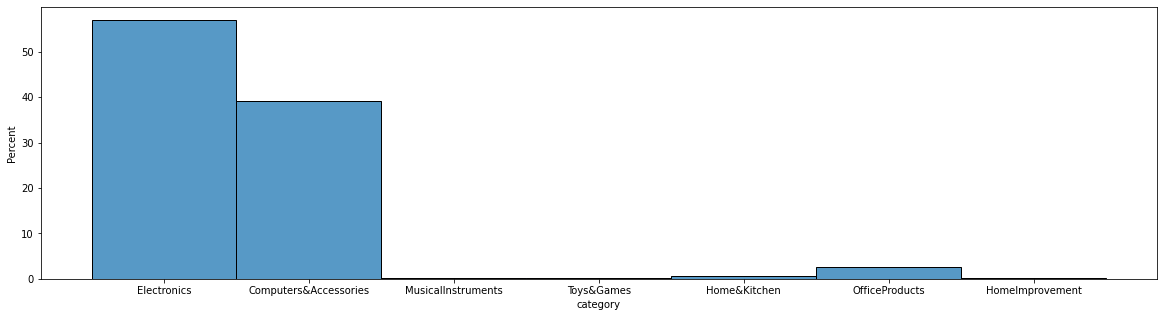

In [17]:
plt.figure(figsize=(20,5))
sns.histplot(data=final_df, x='category', stat='percent')

# 2. Número de produtos com alta demanda em cada categoria 

<AxesSubplot:xlabel='category', ylabel='rating_count'>

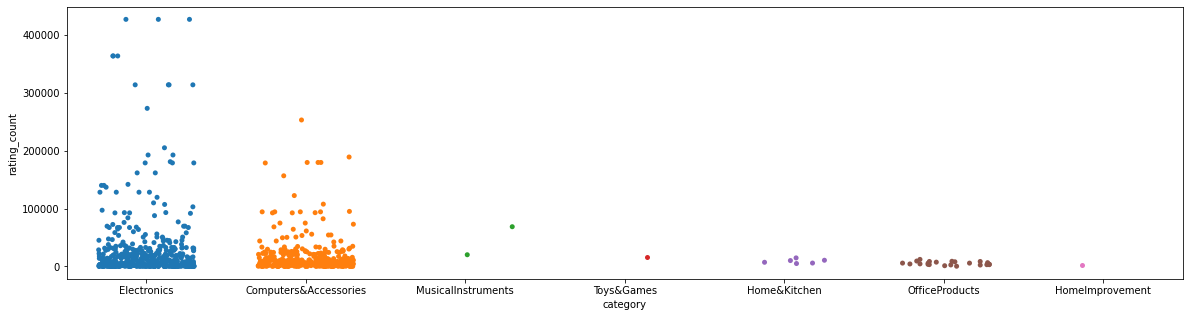

In [18]:
plt.figure(figsize=(20,5))
sns.stripplot(data=final_df, x='category', y='rating_count', jitter=0.3)

# 3. Relação de demanda com desconto

<AxesSubplot:xlabel='discounted_price', ylabel='rating_count'>

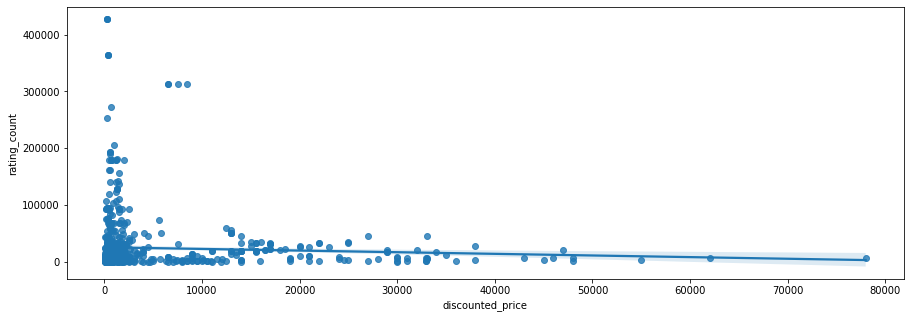

In [19]:
plt.figure(figsize=(15,5))
sns.regplot(data=final_df, x='discounted_price', y='rating_count', )

# 4. Variação na porcentagem de desconto disponível nas 3 principais categorias

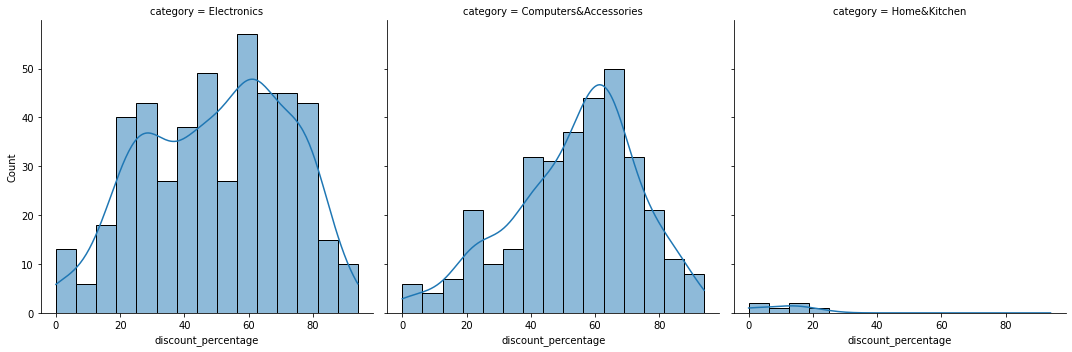

In [20]:
cat_lst = ('Electronics', 'Home&Kitchen','Computers&Accessories')
ddf = final_df[final_df['category'].isin(cat_lst)]

sns.displot(data=ddf, x='discount_percentage', col='category', kind='hist', kde=True, palette='viridis')

# Dashboard

In [21]:
pw_chart = pw.Pywedge_Charts(ddf, c=None, y='rating_count')

/usr/local/lib/python3.9/dist-packages/pywedge/pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


In [22]:
charts = pw_chart.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')